In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy.stats import pearsonr

import sys
sys.path.append('../utility/')
import plot_settings

# Model config plots

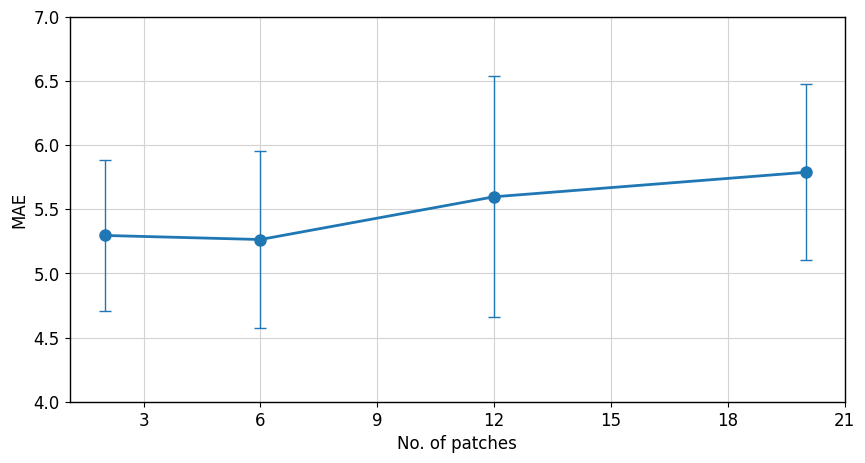

In [17]:
patch_sizes = [20, 12, 6, 2]
patch_values = [5.7878, 5.5969, 5.2639, 5.2957]
patch_std = [0.6871, 0.9373, 0.6907, 0.5915]


def lineplot_patches():
    fig, ax = plt.subplots()
    ax.errorbar(patch_sizes, patch_values, 
                yerr=patch_std, 
                elinewidth=1, 
                capsize=4, 
                capthick=1)
    ax.set_ylim([4, 7])
    ax.set_xlabel('No. of patches')
    ax.set_ylabel('MAE')
    ax.set_xticks([3, 6, 9, 12, 15, 18, 21])
    
    return plt.show()

lineplot_patches()

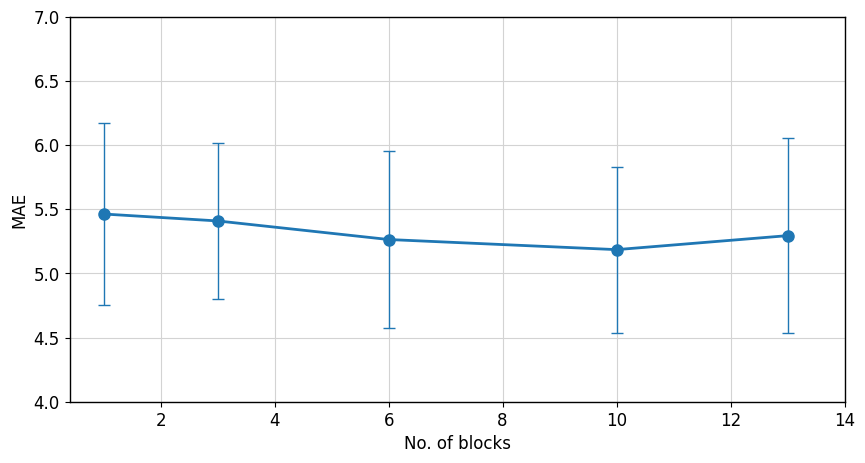

In [65]:
block_sizes = [13, 10, 6, 3, 1]
block_values = [5.2941, 5.1851, 5.2639, 5.4087, 5.4627]
block_stds = [0.76, 0.6465, 0.6907, 0.6082, 0.7077]

def lineplot_blocks():
    fig, ax = plt.subplots()
    ax.errorbar(block_sizes, block_values, 
                yerr=block_stds, 
                elinewidth=1,
                capsize=4, 
                capthick=1)
    ax.set_ylim([4, 7])
    ax.set_xlabel('No. of blocks')
    ax.set_ylabel('MAE')
    ax.set_xticks([2, 4, 6, 8, 10, 12, 14])
    
    return plt.show()

lineplot_blocks()

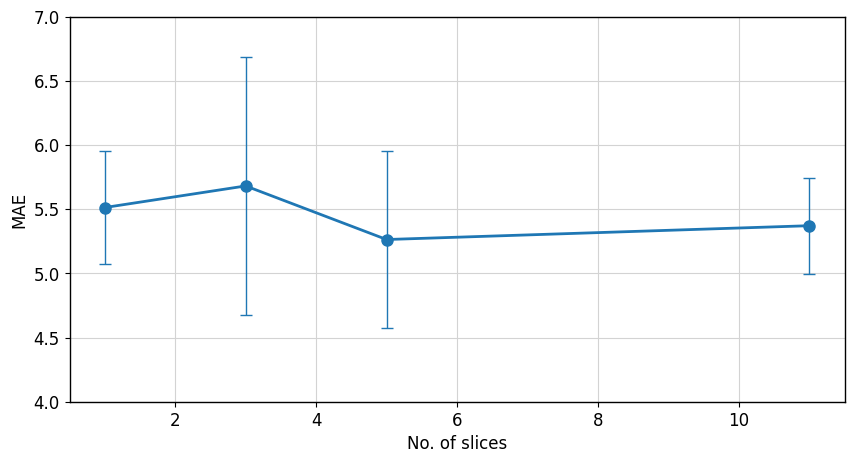

In [72]:
slice_sizes = [11, 5, 3, 1]
slice_values = [5.3716, 5.2639, 5.6814, 5.5132]
slice_stds = [0.3742, 0.6907, 1.0058, 0.4421]

def lineplot_slices():
    fig, ax = plt.subplots()
    ax.errorbar(slice_sizes, slice_values, 
                yerr=slice_stds, 
                elinewidth=1,
                capsize=4, 
                capthick=1)
    ax.set_ylim([4, 7])
    ax.set_xlabel('No. of slices')
    ax.set_ylabel('MAE')
    
    return plt.show()

lineplot_slices()

# Chronological age vs. estimated age

In [18]:
data = pd.read_pickle('../models/09-05-2023/loss/df_healthy_subjects_configured_model_epoch_100_d49dcf44-a51b-41c7-9851-5912240c64b3.pkl')

In [19]:
data

,Age,Predicted Age,Error
0,68.0,68.293663,0.325264
1,72.0,71.072166,0.927837
2,82.0,74.702408,7.297591
3,52.0,57.539669,5.539666
4,55.0,58.049511,3.049507
...,...,...,...
95,65.0,64.249435,1.085008
96,69.0,66.996483,2.003514
97,72.0,70.847496,1.726813
98,64.0,72.382515,8.382515


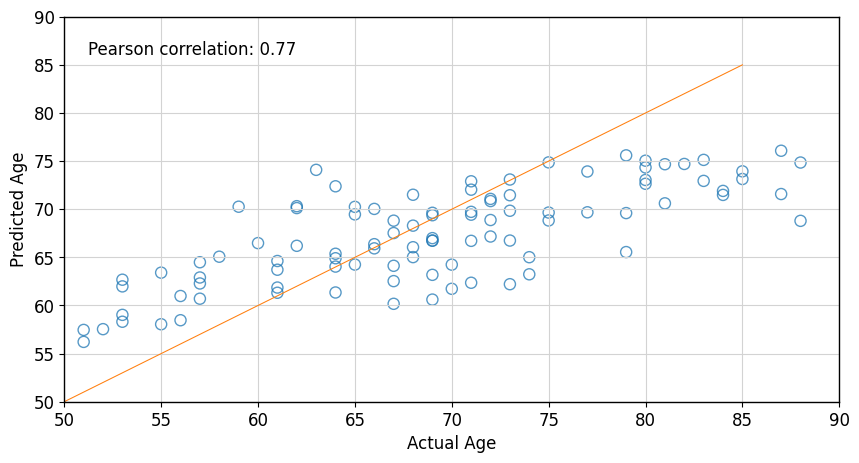

In [20]:
y = data['Predicted Age']
x = data['Age']

color_cycle = mpl.rcParams['axes.prop_cycle'].by_key()['color']

def pearson_plot():
    fig, ax = plt.subplots()
    ax.scatter(x, y, facecolors='none', edgecolors=color_cycle[0], alpha=0.75)

    # Plot the line
    ax.plot([50, 85], [50, 85], color=color_cycle[1], linestyle='-', marker='', linewidth=0.75)

    # Calculate and add the Pearson correlation coefficient to the plot
    corr, _ = pearsonr(x, y)
    ax.text(0.03, 0.9, f'Pearson correlation: {corr:.2f}', transform=ax.transAxes)

    ax.set_ylabel('Predicted Age')
    ax.set_xlabel('Actual Age')
    ax.set_xlim([50, 90])
    ax.set_ylim([50, 90])

    plt.show()


pearson_plot()

# Cumulative score vs error level (years)

In [22]:
# Antal fejl under 1, 2, 3, 4 og 5 år
error_less_1 = data.loc[data['Error'] < 1]
error_less_2 = data.loc[data['Error'] < 2]
error_less_3 = data.loc[data['Error'] < 3]
error_less_4 = data.loc[data['Error'] < 4]
error_less_5 = data.loc[data['Error'] < 5]


# Udregning af procentvise andel af fejl under 1, 2, 3, 4 og 5 år
error_counts_perc = [
                    (len(error_less_1)/len(data['Error']))*100, (len(error_less_2)/len(data['Error']))*100, \
                    (len(error_less_3)/len(data['Error']))*100, (len(error_less_4)/len(data['Error']))*100, \
                    (len(error_less_5)/len(data['Error']))*100
]

# Error fejl
error_level = [1, 2, 3, 4, 5]
    

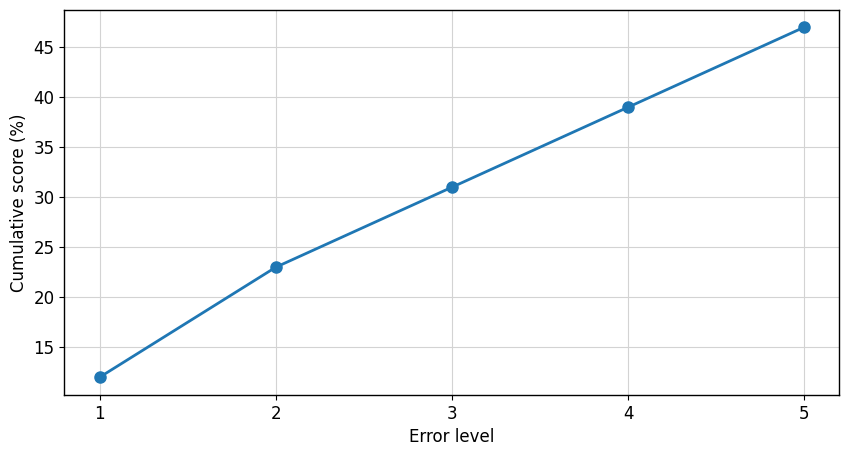

In [23]:
def cs_plot():
    fig, ax = plt.subplots()
    ax.plot(error_level, error_counts_perc)
    ax.set_xlabel('Error level')
    ax.set_ylabel('Cumulative score (%)')
    ax.set_xticks(error_level)
    
    plt.show()

cs_plot()